In [1]:
using Plots
using EmpiricalBayes
using Distributions
using StatsBase

In [2]:
true_dist = MixtureModel([ Normal(-0.3,.2), Normal(0,0.9)],[0.8, 0.2])

MixtureModel{Distributions.Normal{Float64}}(K = 2)
components[1] (prior = 0.8000): Distributions.Normal{Float64}(μ=-0.3, σ=0.2)
components[2] (prior = 0.2000): Distributions.Normal{Float64}(μ=0.0, σ=0.9)


In [3]:
marginal_grid = collect(linspace(-6,6,1001));
prior_grid = collect(linspace(-3,3,121));
marginal_h = marginal_grid[2]-marginal_grid[1];

In [4]:
d_true = NormalConvolutionProblem(true_dist, marginal_grid)
ds = MixingNormalConvolutionProblem(Normal, 0.2, prior_grid, marginal_grid);

In [ ]:
pgfplots()

In [162]:
true_g = pdf.(true_dist, marginal_grid);

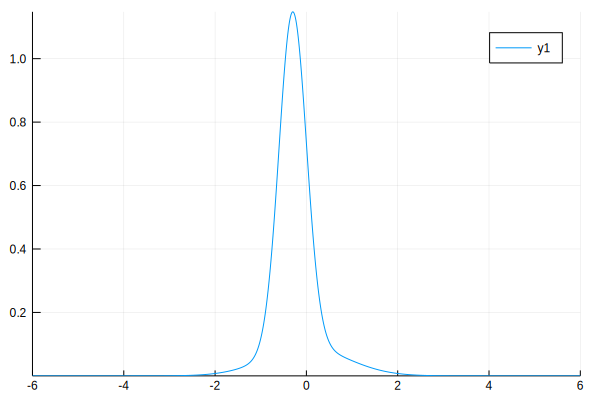

In [165]:
plot(marginal_grid,true_g)

In [5]:
#srand(1)
Xs = rand(d_true,10_000);
extrema(Xs)

(-5.662547794161859, 3.8778125697666423)

In [8]:
target = PosteriorTarget(LFSRNumerator(3.0))

EmpiricalBayes.PosteriorTarget(EmpiricalBayes.LFSRNumerator(3.0), EmpiricalBayes.MarginalDensityTarget(3.0))

In [9]:
post_st = posterior_stats(d_true, target)[3]

0.7785362284587654

In [247]:
RCall.NilSxp

RCall.NilSxp

In [10]:
brad_fit = fit(BradDeconvolveR, Xs; deltaAt = :nothing)

  NA/Inf replaced by maximum positive value
Warning in stats::nlm(f = loglik, p = aStart, gradtol = 1e-10, ...) :
  NA/Inf replaced by maximum positive value
Warning in stats::nlm(f = loglik, p = aStart, gradtol = 1e-10, ...) :
  NA/Inf replaced by maximum positive value


EmpiricalBayes.BradDeconvolveR([-3.6, -3.4, -3.2, -3.0, -2.8, -2.6, -2.4, -2.2, -2.0, -1.8  …  1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0, 3.2, 3.4, 3.6], [0.000796084, 0.000272416, 9.95022e-5, 4.14079e-5, 2.0956e-5, 1.37669e-5, 1.25311e-5, 1.68693e-5, 3.52674e-5, 0.000106544  …  0.00106453, 0.000714903, 0.00048491, 0.000330048, 0.00022517, 0.000153919, 0.000105378, 7.22303e-5, 4.95481e-5, 3.40019e-5], [-4.74322e-5, 0.000114214, 8.72275e-5, 5.34604e-5, 3.43906e-5, 2.62288e-5, 2.58388e-5, 3.52551e-5, 6.95735e-5, 0.000184613  …  -0.000744271, -0.00053769, -0.000330773, -0.000155086, -2.96309e-5, 4.79842e-5, 8.84261e-5, 0.000103256, 0.000102166, 9.23287e-5], [1.72176e-7 4.75057e-8 … 6.9522e-9 5.60897e-9; 4.75057e-8 1.59262e-8 … 2.08719e-9 1.8094e-9; … ; 6.9522e-9 2.08719e-9 … 1.21298e-9 9.60216e-10; 5.60897e-9 1.8094e-9 … 9.60216e-10 7.78417e-10])

In [11]:
confint(brad_fit, target)

(0.8381346013817599, 0.8866511896792877)

In [222]:
#srand(2)   
Xs = rand(d_true,10_000);

n_total = length(Xs)
    n_half = ceil(Int, n_total/2)
    idx_test = sample(1:n_total, n_half, replace=false)
    idx_train = setdiff(1:n_total, idx_test)
    Xs_train = Xs[idx_train]
    Xs_test = Xs[idx_test];

In [175]:
cbt = CEB_ci(Xs_train, Xs_test, ds, target)

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


(EmpiricalBayes.DonohoCI(0.006171959996565582, 0.008102580800303622, 0.7617276703163892, 0.8226022452310986, 0.7359009001557166, 0.9093035903064806, 0.03023192805926349, 0.04795684494853953, EmpiricalBayes.BinnedMarginalDensity([6.65359e-6, 6.04524e-6, 5.43019e-6, 4.80914e-6, 4.18273e-6, 3.55166e-6, 2.91661e-6, 2.27825e-6, 1.63729e-6, 9.94407e-7  …  1.22281e-5, 1.17216e-5, 1.12022e-5, 1.06704e-5, 1.01269e-5, 9.57225e-6, 9.00708e-6, 8.43199e-6, 7.84762e-6, 7.25461e-6], [-6.0, -5.988, -5.976, -5.964, -5.952, -5.94, -5.928, -5.916, -5.904, -5.892  …  5.892, 5.904, 5.916, 5.928, 5.94, 5.952, 5.964, 5.976, 5.988, 6.0], 0.011999999999999567), EmpiricalBayes.MinimaxCalibrator(EmpiricalBayes.BinnedCalibrator([-6.0, -5.988, -5.976, -5.964, -5.952, -5.94, -5.928, -5.916, -5.904, -5.892  …  5.892, 5.904, 5.916, 5.928, 5.94, 5.952, 5.964, 5.976, 5.988, 6.0], 0.011999999999999567, [0.000742877, 0.000771818, 0.000801759, 0.000832729, 0.000864757, 0.000897873, 0.000932109, 0.000967494, 0.00100406, 0.

In [176]:
cbt[1].ci_left, cbt[1].ci_right

(0.7359009001557166, 0.9093035903064806)

In [181]:
cbt[4].C_std, cbt[4].C_bias

(0.008128351248296473, 0.0011024530326004924)

In [238]:
#srand(2)   
cnt =0;
while (true)
            @show cnt += 1

Xs = rand(d_true,10_000);

n_total = length(Xs)
    n_half = ceil(Int, n_total/2)
    idx_test = sample(1:n_total, n_half, replace=false)
    idx_train = setdiff(1:n_total, idx_test)
    Xs_train = Xs[idx_train]
    Xs_test = Xs[idx_test];

tst = CEB_ci(Xs_train, Xs_test, ds, target, cbt[2], cbt[3], 0.0012)
@show tst[1].ci_left, tst[1].ci_right
   if tst[1].ci_left > post_st
        break;
   end     
end

cnt += 1 = 1
Academic license - for non-commercial use only
(tst[1].ci_left, tst[1].ci_right) = (0.7992953130667314, 1.0759008078157413)


(0.7421091227213984, 0.8727843067084416)